In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)


x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [5]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


file_path = './modelchpoint_test.h5'                # 저장할 file path

checkpoint = ModelCheckpoint(file_path,             # 저장할 file path
                             monitor='val_loss',    # val_loss 값이 개선되었을때 호출
                             verbose=1,             # log 출력
                             save_best_only=True,   # best 값만 저장
                             mode='auto')           # auto는 자동으로 best를 찾음


stopping = EarlyStopping(monitor='val_loss',        # 관찰대상은 val_loss 
                         patience=5,
                         verbose=1)                # 5 epoch 동안 개선되지 않으면 조기종료


hist = model.fit(x_train, t_train, 
                 epochs=50, validation_split=0.2,
                 callbacks=[checkpoint, stopping])

Epoch 1/50
1473/1500 [============================>.] - ETA: 0s - loss: 0.5670 - accuracy: 0.7966
Epoch 00001: val_loss improved from inf to 0.43702, saving model to .\modelchpoint_test.h5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5650 - accuracy: 0.7973 - val_loss: 0.4370 - val_accuracy: 0.8387
Epoch 2/50
1465/1500 [============================>.] - ETA: 0s - loss: 0.4149 - accuracy: 0.8497
Epoch 00002: val_loss improved from 0.43702 to 0.41483, saving model to .\modelchpoint_test.h5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4138 - accuracy: 0.8499 - val_loss: 0.4148 - val_accuracy: 0.8478
Epoch 3/50
1448/1500 [===========================>..] - ETA: 0s - loss: 0.3754 - accuracy: 0.8626
Epoch 00003: val_loss improved from 0.41483 to 0.36399, saving model to .\modelchpoint_test.h5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8629 - val_loss: 0.3640 - val_accuracy: 0.8688
Epoch 4/50
1465/1500 [====

In [7]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8756


[0.36230453848838806, 0.8755999803543091]

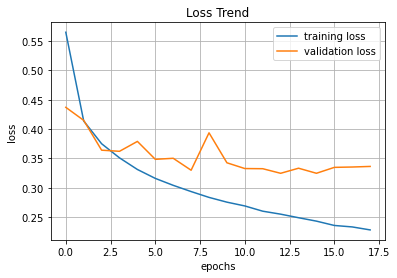

In [8]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

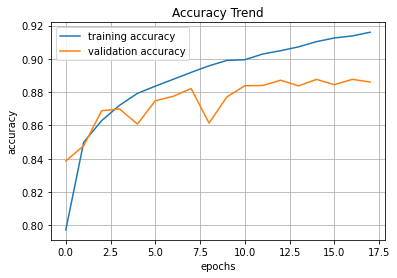

In [9]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

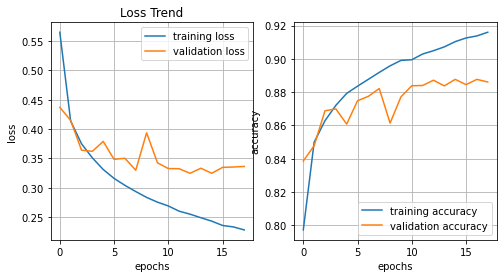

In [10]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()